## Import Libraries and Loading Dataset

Let’s start the project by importing all necessary libraries for statistical analysis and loading the dataset.


In [2]:
# Import libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy.stats import f_oneway, chi2_contingency, ttest_1samp, ttest_ind

#Load Dataset
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
#size of the data
df.shape 

(1000, 8)

In [4]:
#display the top 5 records of the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Let’s explore the data types of each variable and count missing or NULL values in the dataset.


In [6]:
# explore each variable and its data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


As we can see, this dataset has a mix of categorical and numerical features. Also, none of the features contain missing or NULL values.

## Measure of Central Tendency and Dispersion

In this step, we will analyze numerical features by using measures of central tendency (mean) and dispersion (standard deviation). We will use the `describe` function provided by Pandas in Python.


In [9]:
# explore the mean and standard deviation of numerical variables
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights from the above figure

- The average score is highest in reading and lowest in math.
- The dispersion of values is highest in writing and lowest in reading.
- Overall, there is no major difference in the mean and standard deviation among features.


## Hypothesis Testing

Hypothesis testing is a statistical method used to test whether a hypothesis about a population or sample is true or false. In hypothesis testing, we start with a null hypothesis. The null hypothesis generally states that there is no significant difference between the population parameter and a hypothesized value or between two variables/samples.

In this step, we will test four different kinds of hypotheses using various techniques. In this entire analysis, our significance level is set to 0.05. It means that if, for a given hypothesis, the p-value is less than 0.05, then only we can reject the null hypothesis.

### Hypothesis 1
There is no significant difference between a student's performance in any skills - reading, writing, or math.

**Null Hypothesis (Ho)**: There is no difference in the performance of students between math, reading, and writing skills.

**Alternative Hypothesis (Ha)**: There is a difference in the performance of students between math, reading, and writing skills.

We will use a one-way ANOVA test to validate this hypothesis. First, compare the histogram of each variable.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13320\3896523785.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'], label='math score')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13320\3896523785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'], label='re

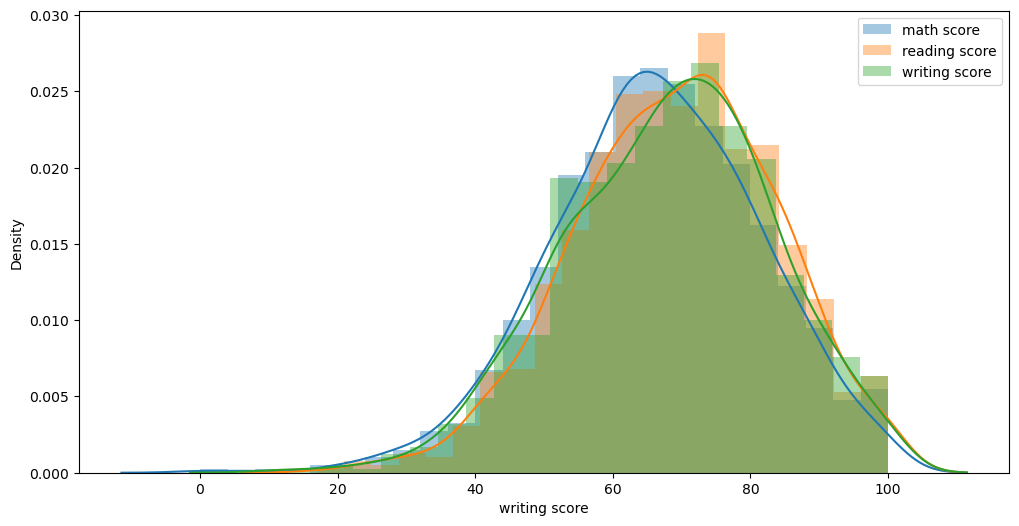

In [12]:
# compare histogram 
plt.figure(figsize=(12,6))
sns.distplot(df['math score'], label='math score')
sns.distplot(df['reading score'], label='reading score')
sns.distplot(df['writing score'], label='writing score')
plt.legend()

- As we can see, it seems that all three samples have the same population mean, and it seems there is no significant difference between them at all. Let’s apply a one-way ANOVA test on these variables.

In [14]:
# Applying one way ANOVA test
one_way_anova_test = f_oneway(df['math score'], df['reading score'], df['writing score'])
print('P-Value for One Way ANOVA Test is - {}'.format(one_way_anova_test.pvalue))

P-Value for One Way ANOVA Test is - 2.0701893192229333e-05


Observed p-value in our hypothesis is **0.00207**, which is much lower than the significance level. This means there is a difference between the scores of each skill, and we can reject our null hypothesis. If the null hypothesis in the ANOVA test is rejected, we conclude that at least one of the population means is different. However, it doesn’t provide insight into which means are different.

### Hypothesis 2
There is no relation between the gender of a student and their corresponding academic performance.

**Null Hypothesis (Ho)**: There is no relation between the gender of a student and their corresponding academic performance.

**Alternative Hypothesis (Ha)**: There is a relation between the gender of a student and their corresponding academic performance.

We will create a new feature representing whether a student failed or passed. We'll take the average of all three scores, and if the score is above 40, we will consider the student as passed. As these are categorical variables, we will use the **chi-square test of independence** to test the significance between these two variables.
ch variable.
riables.


In [16]:
# Create a new feature representing whether student passed or not
df['overall_performance'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df['final_verdict'] = df['overall_performance'].apply(lambda i : 'Pass' if i>=40 else 'Fail')

# create a contingency table based on the two categorical variables for the chi-square test.
contingency_table = pd.crosstab(df['gender'], df['final_verdict'], margins=True)
contingency_table

final_verdict,Fail,Pass,All
gender,,,
female,16,502,518
male,14,468,482
All,30,970,1000


From this table, we can extract data for female students and male students and will use them to perform a chi-square test of independence.

In [18]:
# extract data for students of both genders
female_data = contingency_table.iloc[0, :].values[0:2].tolist()
male_data = contingency_table.iloc[1, :].values[0:2].tolist()

# apply chi-square test 
chi_square_test = chi2_contingency(female_data,male_data)
print('P-value for Chi Square Test is - {}'.format(chi_square_test.pvalue))

P-value for Chi Square Test is - 1.0


Since our observed p-value is less than the significance level, we can’t reject our null hypothesis.

### Hypothesis 3
An educational consultancy claims that students receive a mean score of 70 or more on average.

**Null Hypothesis (Ho)**: The overall performance of students is greater than or equal to a score of 70.

**Alternative Hypothesis (Ha)**: The overall performance of students is less than 70.

In this hypothesis, we want to compare the sample's mean with the claimed population mean. For this, we will use the **one-sample t-test** (one-sided) to test this hypothesis.

First, let’s explore the histogram of the overall performance in our dataset. As shown in the figure below, the mean of our sample is **67.77**, and most values are spread around **50-90**. Using the one-sample t-test, we will check whether this is just due to chance or is it representative of a larger population.


<Axes: xlabel='overall_performance', ylabel='Count'>

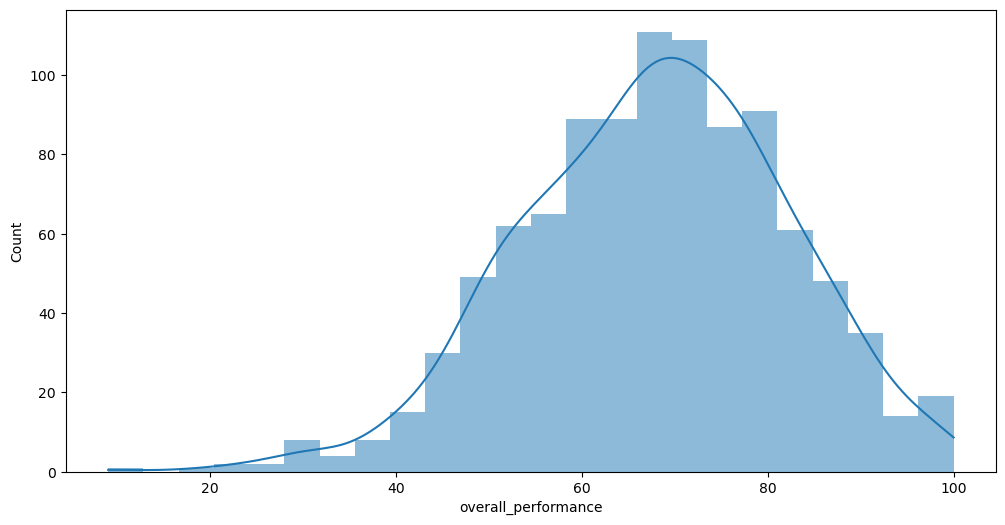

In [20]:
# Histogram of overall performance
plt.figure(figsize=(12,6))
sns.histplot(df['overall_performance'],kde=True, linewidth=False)    

In [21]:
# apply one sample t-test on the sample overall performance
t_test_samp= ttest_1samp(a=df['overall_performance'], popmean=70)
print('P-value for one sample t-test is - {}'.format(t_test_ind_pvalue.pvalue))

NameError: name 't_test_ind_pvalue' is not defined

As the observed p-value is smaller than **0.05** (significance level), it provides strong evidence to reject the null hypothesis in favor of the alternative. Therefore, we can reject the educational consultancy’s claims.

### Hypothesis 4
There is no significant difference in the mean math scores of students who have taken test preparation and those who have not. Let’s define our hypotheses:

**Null Hypothesis (Ho)**: There is no difference in students' math scores, irrespective of whether they have taken test preparation.

**Alternative Hypothesis (Ha)**: There is a difference in students' math scores between those who have completed test preparation and those who have not.

Here, we want to compare two samples and check whether they are statistically different. We will use a **two-sample t-test (independent t-test)** to check our hypothesis. 

Let’s explore the mean parameter of both samples. 📊


In [ ]:
# Explore mean of both samples
print('Mean Math Score of Students With Test Preparation is - {}'.format(df[df['test preparation course'] == 'completed']['math score'].mean()))
print('Mean Math Score of Students Withou Test Preparation is - {}'.format(df[df['test preparation course'] == 'none']['math score'].mean()))

As we can see, the average math score is higher in the case of the students who have completed the test preparation course. Let’s apply a two-sample t-test to check whether this is just due to chance or whether these are statistically significant.

In [ ]:
# apply two sample t-test
t_test_ind = ttest_ind(df[df['test preparation course'] == 'completed']['math score'], df[df['test preparation course'] == 'none']['math score'])
print('P-value for two sample t-test is - {}'.format(t_test_ind.pvalue))

As the observed p-value is smaller than **0.05** (significance level), it provides strong evidence to reject the null hypothesis in favor of the alternative.

## Summary
Let’s summarize our findings and insights from the statistical analysis of the student performance dataset below:

- There is no major difference in the mean and standard deviation of the sample for scores in math, reading, and writing.
- Students do not perform equally in math, reading, and writing skills, thus special attention must be given to those subjects in which students are not strong.
- Gender does not play an important role in deciding a student’s overall academic performance.
- The educational consultancy’s claim that, on average, students get a respectable score of **70** is false.
- Students who have completed prior test preparation perform better.

# Conclusion
We loaded the student performance dataset containing details of students. We analyzed the mean and standard deviation of the features to understand their central tendency and dispersion. We performed hypothesis testing on four different kinds of hypotheses and tested them using techniques such as the one-way ANOVA test, chi-square test of independence, one-sample t-test, and independent t-test.
